# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets and monthly income variable 
# YOUR CODE HERE!

monthly_income = 12000
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC and ETH price (doing both together gives me a better structure)

response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)

data_btc = response_data_btc.json()
data_eth =response_data_eth.json()
#print(json.dumps(data_btc, indent=4))
#print(json.dumps(data_eth, indent=4))

btc_price = data_btc['data']['1']['quotes']['USD']['price']
eth_price = data_eth['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20106.01
The current value of your 5.3 ETH is $6286.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
print(type(alpaca_api_key))
print(type(alpaca_secret_key))


<class 'str'>
<class 'str'>


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today=pd.Timestamp("2022-12-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today).df
df_portfolio


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_portfolio = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-12-09 05:00:00+00:00  99.12  99.21  98.77  98.79  8990264       26751   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-12-09 05:00:00+00:00  99.011766  394.94  397.62  393.15  393.28   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-12-09 05:00:00+00:00  81417048      485155  395.186953

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.79
Current SPY closing price: $393.28


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19664.00
The current value of your 200 AGG shares is $19758.00


In [11]:
shares = my_spy_value + my_agg_value
print(shares)

crypto = my_btc_value + my_eth_value
print(crypto)

39422.0
26392.66


### Savings Health Analysis

In [12]:
# Set monthly household income (added at the beggining, but adding again just in case)
# YOUR CODE HERE!

monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

shares_amount = my_spy_value + my_agg_value
crypto_amount = my_btc_value + my_eth_value

savings_data  = {'amount':[shares_amount,crypto_amount]}
assets = ['crypto','stock/bond']
# Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame(savings_data, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,39422.00
stock/bond,26392.66


<AxesSubplot:title={'center':'Total Savings in crypto and stock/bonds assets: as of Today'}, ylabel='amount'>

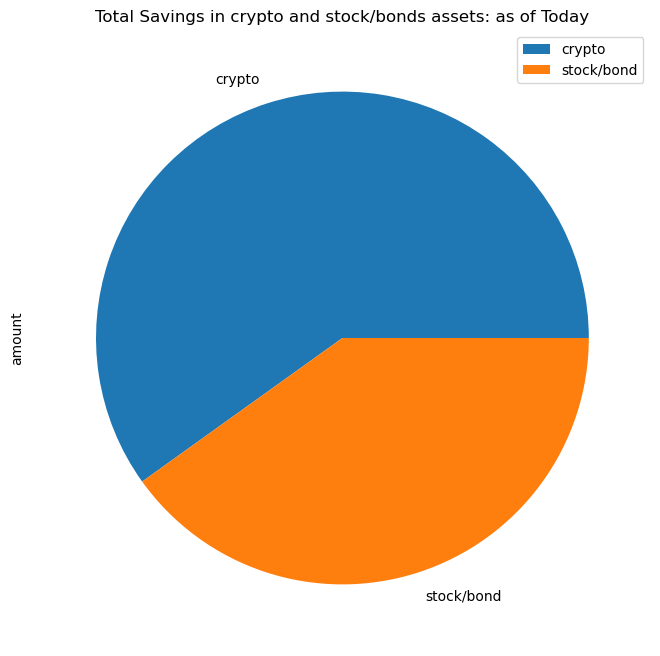

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', y="amount",title= "Total Savings in crypto and stock/bonds assets: as of Today", figsize=(8,8))

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_amount_savings = shares_amount + crypto_amount 

# Validate saving health
# YOUR CODE HERE!

if total_amount_savings > emergency_fund:
        print("Congratulations, you have enough money for an emergency fund!")
elif total_amount_savings == emergency_fund:
        print("Congratulations, you have reach your goal for an emergency fund!")
else:
        print("You are $", emergency_fund - total_amount_savings,"away from reaching your goal")
        

Congratulations, you have enough money for an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df

df_stock_data

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_40_60 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_40_60.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009664,0.995326,0.993223,0.992810,1.001559,0.998914,0.987860,0.991337,1.009529,1.002924,...,0.998544,0.999297,0.999565,1.000298,1.003450,0.993811,1.003000,1.000248,1.002828,0.992168
2,1.012114,0.983290,0.989703,0.988735,1.007112,1.002414,0.988490,0.990113,1.008405,1.013384,...,0.991661,1.009058,0.993573,1.002273,1.001847,1.002457,1.020883,1.003808,1.022345,0.992037
3,1.018130,0.982950,0.993738,0.984470,1.002901,1.000629,0.984874,0.990130,0.999353,1.014093,...,0.980581,1.015825,0.986836,1.006847,0.997850,1.009398,1.024619,1.009655,1.014269,0.998488
4,1.023066,0.975233,0.991713,0.982608,1.004744,1.003279,0.982219,0.996214,1.006203,1.029415,...,0.986098,1.007717,0.992542,1.003913,0.989290,1.020351,1.020934,1.009586,1.010563,1.004020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.067668,13.413231,27.591753,38.399073,22.297476,49.521119,19.165597,10.375122,23.995970,35.681747,...,11.108410,9.508865,15.558786,21.967917,13.362083,21.538177,10.231370,29.367110,22.911525,8.415229
7557,29.508189,13.553174,27.391438,38.446879,22.172488,48.886460,19.065397,10.269144,24.140094,35.496568,...,11.084167,9.555273,15.688769,22.368131,13.196895,21.624317,10.181243,29.464936,23.089780,8.465923
7558,29.597427,13.515671,27.062048,38.576227,21.984140,48.949500,18.930010,10.285069,24.037043,35.431115,...,11.097395,9.526406,15.695342,22.410536,13.056464,21.607092,10.144877,29.481373,22.952001,8.390372
7559,29.781142,13.697120,27.176758,38.671281,21.865569,49.284326,19.163769,10.322905,24.138525,35.546710,...,11.107426,9.642182,15.663462,22.520651,13.088880,21.569697,10.355797,28.880858,23.205320,8.340119


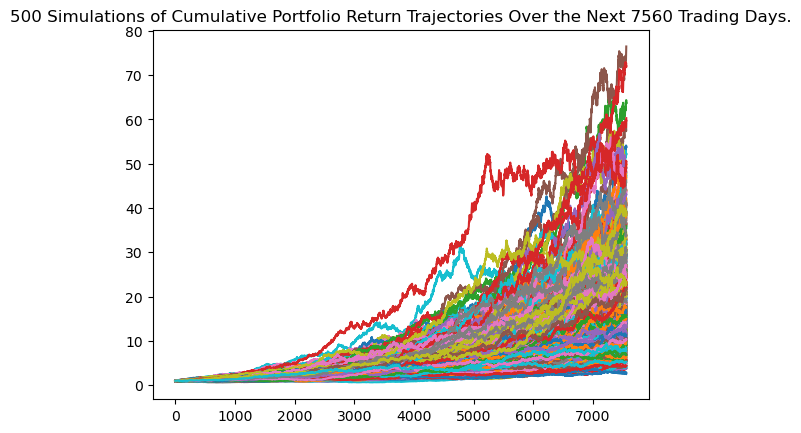

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_40_60.plot_simulation()

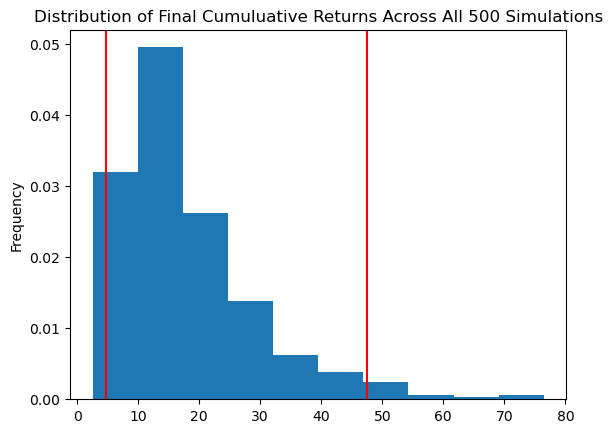

In [23]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_40_60.plot_distribution()


### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl = MC_40_60.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             17.892630
std              11.212899
min               2.570950
25%              10.116601
50%              14.970375
75%              22.682998
max              76.446302
95% CI Lower      4.695562
95% CI Upper     47.474589
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl[8]*initial_investment,2)
ci_upper= round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93911.25 and $949491.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower= round(tbl[8]*initial_investment,2)
ci_upper= round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140866.87 and $1424237.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_40_60_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation=500,
    num_trading_days=252*5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_40_60_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002621,1.012014,1.003452,1.001841,0.996445,0.993971,0.996839,0.993933,0.987201,0.996712,...,1.021379,0.983038,1.003749,0.995794,1.009011,0.998503,1.003043,0.992465,1.003138,0.993833
2,0.990396,1.007596,0.989384,0.994421,0.995441,0.992275,0.997898,1.006455,0.979158,0.998173,...,1.035557,0.963124,1.009660,0.982763,1.010283,1.003790,1.002561,0.975680,1.005182,0.977657
3,0.984186,1.001623,0.984499,0.993899,1.003002,0.995574,0.995312,1.017028,0.995093,0.994797,...,1.014139,0.959436,1.015377,0.977057,1.015065,0.997766,0.997038,0.975647,1.004175,0.980238
4,0.984664,1.007575,0.979568,1.005084,0.995798,0.994188,0.995800,1.019378,0.984982,0.988261,...,1.012040,0.959562,1.012787,0.974242,1.020856,0.992033,0.991303,0.970954,1.002837,0.979102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.693268,1.776466,2.178203,1.286491,1.456856,1.729202,2.564482,2.655797,0.845689,1.063801,...,1.180062,3.490474,1.540549,1.105461,2.911133,0.911665,1.499751,1.458571,1.498754,1.213906
1257,1.706031,1.810429,2.217758,1.278485,1.460595,1.734197,2.561099,2.643161,0.844604,1.041019,...,1.180712,3.481755,1.539008,1.111118,2.963197,0.921516,1.502079,1.458559,1.511950,1.228104
1258,1.674874,1.819438,2.225534,1.262991,1.486115,1.750723,2.604151,2.656317,0.853226,1.041291,...,1.180364,3.542567,1.535091,1.117611,2.944005,0.917034,1.497741,1.468740,1.498911,1.230888
1259,1.679348,1.819022,2.249186,1.259771,1.509856,1.733162,2.604991,2.655932,0.837026,1.048226,...,1.168517,3.500029,1.561514,1.127015,2.931083,0.932546,1.482671,1.493966,1.487428,1.237963


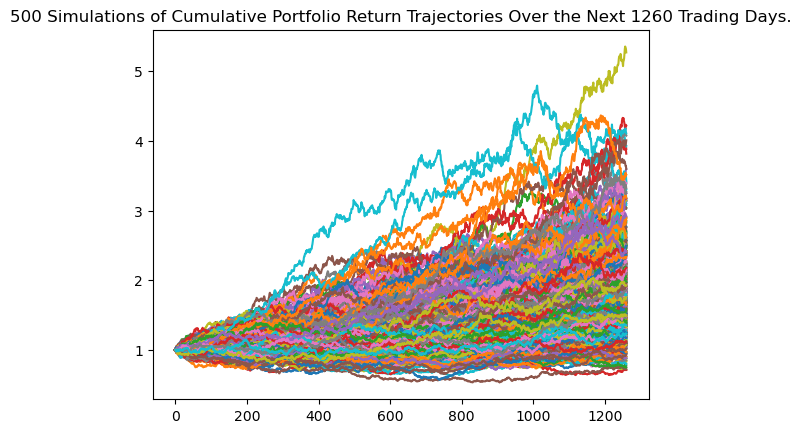

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_40_60_5yrs.plot_simulation()

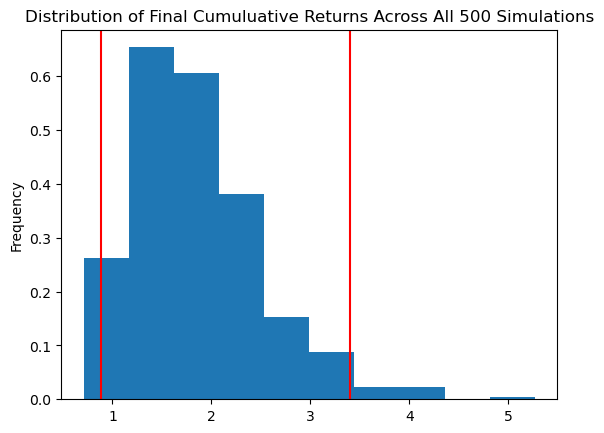

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_40_60_5yrs.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5yrs = MC_40_60_5yrs.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_5yrs)

count           500.000000
mean              1.851873
std               0.658905
min               0.712247
25%               1.380845
50%               1.756934
75%               2.193817
max               5.269193
95% CI Lower      0.881683
95% CI Upper      3.396987
Name: 1260, dtype: float64


In [32]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five= round(tbl[8]*initial_investment,2)
ci_upper_five= round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $281733.75 and $2848475.34


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_20_80_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation=500,
    num_trading_days=252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_20_80_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998768,0.993413,1.002543,0.992506,0.993250,0.999503,0.990144,0.988358,0.992123,0.992626,...,0.988168,1.000616,0.998881,0.983709,1.001204,1.010454,1.007730,0.988118,0.998878,0.998675
2,0.996820,0.982083,1.009804,0.995257,1.002771,1.001605,0.977876,1.002707,0.973677,0.998872,...,0.981686,1.009754,0.989140,0.993267,0.986012,1.019431,1.009023,0.969672,0.983563,1.000690
3,1.006569,0.985514,1.010088,1.007733,0.983830,0.999333,0.965878,1.004120,0.973560,0.992304,...,0.970381,1.014160,0.989641,0.995964,0.984197,1.031636,1.001100,0.959341,0.969874,1.003346
4,1.009047,0.990317,1.013925,1.006022,0.964761,0.994339,0.971261,0.999569,0.971489,0.987771,...,0.977415,0.991898,0.986847,1.004347,0.970210,1.029797,1.012085,0.946046,0.959688,1.000113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.668333,3.993114,3.537810,2.108987,3.296427,8.191666,3.971416,3.332274,5.063838,2.333619,...,2.235745,4.260627,3.749418,2.981264,3.364883,1.719937,6.180866,1.670900,2.440390,6.392392
2517,2.675197,4.025459,3.556123,2.115453,3.281922,8.191530,3.984522,3.313920,5.024693,2.347169,...,2.253221,4.300717,3.819553,2.992438,3.372743,1.721302,6.221705,1.649196,2.397400,6.421964
2518,2.668480,3.980818,3.501859,2.097503,3.218518,8.062715,4.013648,3.339121,5.084643,2.315240,...,2.265644,4.243112,3.756278,3.015241,3.350124,1.752408,6.264717,1.633506,2.406932,6.418755
2519,2.650878,4.006287,3.513204,2.093264,3.225486,8.226163,4.017350,3.340153,5.037998,2.299330,...,2.274599,4.305125,3.767068,3.021753,3.408300,1.778874,6.270463,1.624609,2.474998,6.354962


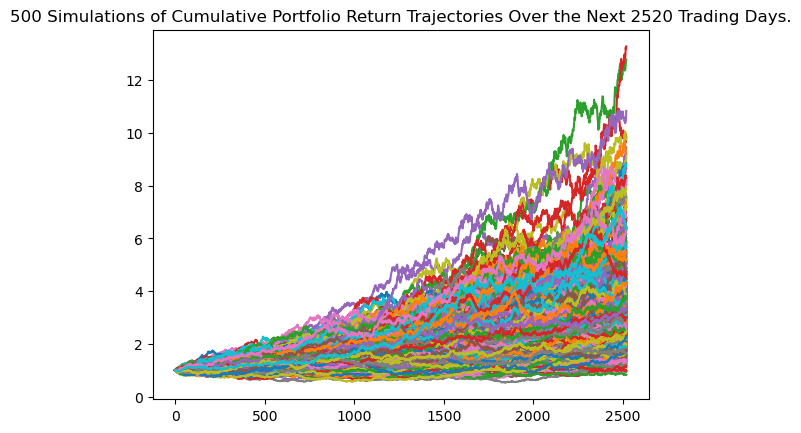

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_20_80_10yrs.plot_simulation()


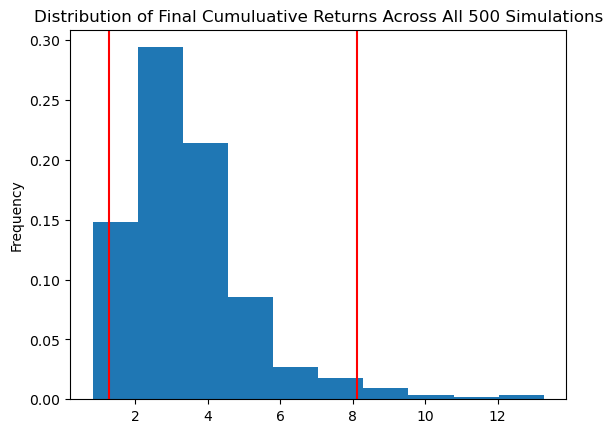

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_20_80_10yrs.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_10yrs = MC_20_80_10yrs.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_10yrs)


count           500.000000
mean              3.466235
std               1.714050
min               0.828711
25%               2.332251
50%               3.196555
75%               4.140408
max              13.273643
95% CI Lower      1.267975
95% CI Upper      8.127523
Name: 2520, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten= round(tbl[8]*initial_investment,2)
ci_upper_ten= round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $281733.75 and $2848475.34


In [39]:
#According to Investopedia, your reteriment income should be 80% of last year working year.
#The monthly income in this case is $12,000, or 144,000 per year. 
#80% of that will be $115,200 a year or 9,600 per month. 
#In addition, the retirement plan should be intended to last about 30 years. 
#In this case, none of these scenarios will be giving them enough money for a 30 year retirement.
#However, the $60,000 early retirement plan is giving them a higher return and that will be my reccomendation 